<a href="https://colab.research.google.com/github/King-Bowie/Estatistica_com_Python_parte_1/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/King-Bowie/Estatistica_com_Python_parte_1/main/dados/dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
dados.Renda.max()

200000

In [5]:
dados.Renda.min()

0

In [6]:
classes = [dados.Renda.min(),2*788,5*788,15*788,25*788,dados.Renda.max()]

### 2º Definir os labels das classes

In [7]:
labels = [ 'Até 2 SM','Até 5 SM','Até 15 SM','Até 25 SM','Acima 25 SM']

### 3º Construir a coluna de frequências

In [8]:
 pd.cut(x = dados.Renda,
            bins = classes,
            labels = labels,
            include_lowest = True)

0        Até 2 SM
1        Até 2 SM
2        Até 2 SM
3        Até 5 SM
4        Até 2 SM
           ...   
76835    Até 2 SM
76836    Até 2 SM
76837    Até 2 SM
76838    Até 2 SM
76839    Até 2 SM
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['Até 2 SM' < 'Até 5 SM' < 'Até 15 SM' < 'Até 25 SM' < 'Acima 25 SM']

In [9]:
dados.Renda.head()

0     800
1    1150
2     880
3    3500
4     150
Name: Renda, dtype: int64

In [10]:
contagem = pd.value_counts(
                pd.cut(x = dados.Renda,
                bins = classes,
                labels = labels,
                include_lowest = True)
           )
contagem

Até 2 SM       49755
Até 5 SM       18602
Até 15 SM       7241
Até 25 SM        822
Acima 25 SM      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [11]:
porcentagem = pd.value_counts(
                pd.cut(x = dados.Renda,
                          bins = classes,
                          labels = labels,
                          include_lowest = True),
              normalize = True) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [12]:
tabela_rendas = pd.DataFrame( {'Porcentagem (%)': porcentagem, 'Frequência': contagem})
tabela_rendas

,Porcentagem (%),Frequência
Até 2 SM,64.751432,49755
Até 5 SM,24.208745,18602
Até 15 SM,9.423477,7241
Até 25 SM,1.069755,822
Acima 25 SM,0.546590,420


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

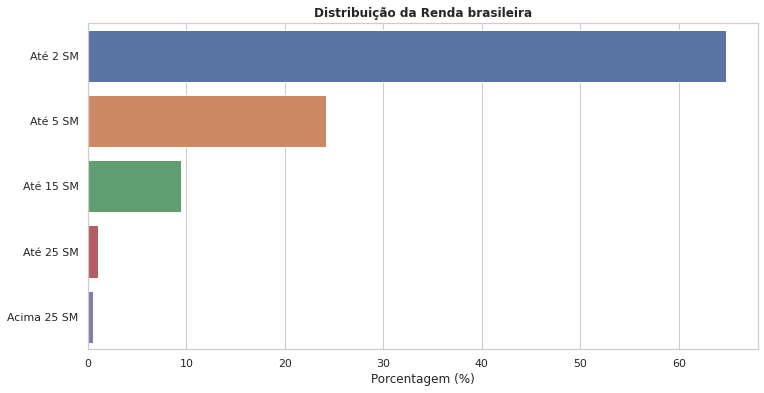

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data= tabela_rendas, x= tabela_rendas['Porcentagem (%)'],
            y=tabela_rendas.index,
            orient='h')
plt.title('Distribuição da Renda brasileira',fontweight= 'bold')
plt.show()

> ### Conclusões

Podemos analisar que grande parte da população (acima de 60%) recebe até 2 salários mínimos, e vai diminuindo a frequência de pessoas de forma desproporcional de acordo com o aumento das classes salariais. 

Este é o retrato da desiguadade de renda no Brasil em 2015.

Saiba mais: <a href='https://exame.com/economia/brasil-e-mais-desigual-do-que-se-imaginava-diz-pesquisador/'> reportagem do jornal Exame publicada em 2016</a>

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='red'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


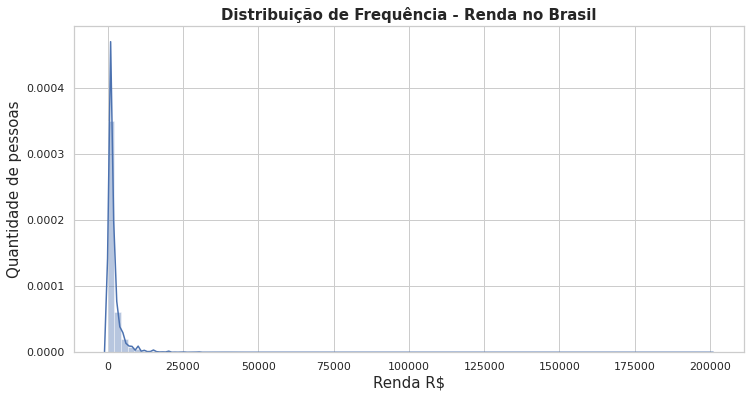

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(dados['Renda'],kde=True,bins=90)
plt.ylabel('Quantidade de pessoas',fontsize=15)
plt.xlabel('Renda R$',fontsize=15)
plt.title('Distribuição de Frequência - Renda no Brasil',fontsize=15, fontweight = 'bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


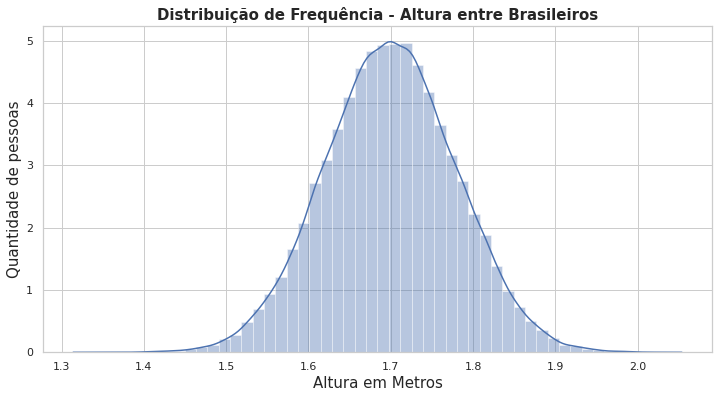

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(dados.Altura,kde=True)
plt.ylabel('Quantidade de pessoas',fontsize=15)
plt.xlabel('Altura em Metros',fontsize=15)
plt.title('Distribuição de Frequência - Altura entre Brasileiros',fontsize=15, fontweight = 'bold')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


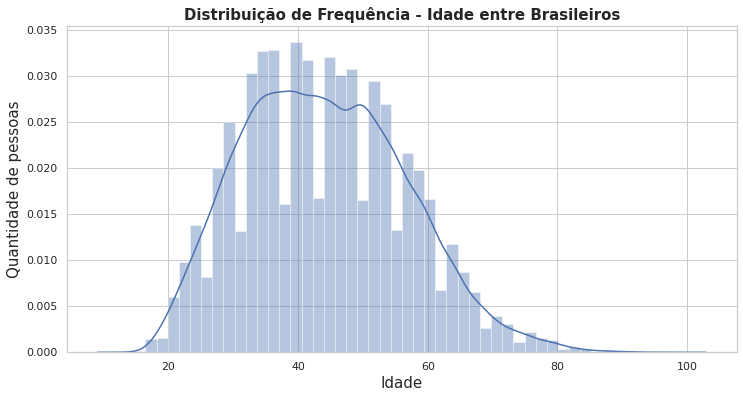

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(dados.Idade,kde=True)
plt.ylabel('Quantidade de pessoas',fontsize=15)
plt.xlabel('Idade',fontsize=15)
plt.title('Distribuição de Frequência - Idade entre Brasileiros',fontsize=15, fontweight = 'bold')
plt.show()
plt.show()

> ### Conclusões

Através destes dados encontramos um **padrão entre a maioria da população brasileira**: 

* Recebem até 2 salários mínimos,

* Possui aproximadamente 1,70 metros de altura 

* Entre a faixa de idade entre 35 e 55 anos.


Algo intrigante são os vales nas idades que pode ter sido alterado pelos entrevistados onde provavelmente disseram que tinha por exemplo 40 anos mas tinha 40. 


Análises estatísticas:

1. Renda possui uma assimetria à direita,

2. Altura possui simetria entre suas medidas,

3. Idade possui assimetria à direita.




### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

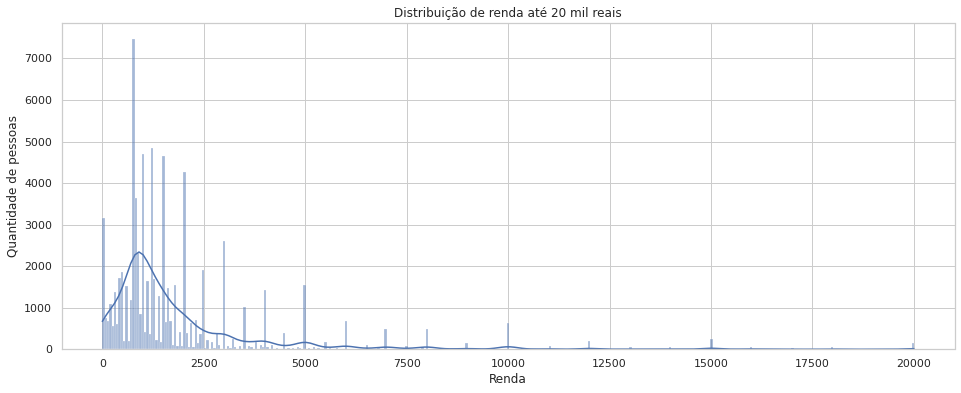

In [17]:
renda_20 = dados.Renda.loc[dados['Renda'] <= 20000]
plt.figure(figsize=(16,6))
sns.histplot(data=renda_20, kde=True)
plt.title('Distribuição de renda até 20 mil reais')
plt.ylabel('Quantidade de pessoas')
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='red'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [18]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [19]:
frequencia_sxc = pd.crosstab(dados.Sexo,dados.Cor)
frequencia_sxc.rename(index=sexo,columns=cor, inplace=True)
frequencia_sxc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [20]:
percentual_sxc = pd.crosstab(dados.Sexo,dados.Cor, normalize=True)*100
percentual_sxc.rename(index=sexo,columns=cor, inplace=True)
percentual_sxc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões
Atráves destes dados podemos analisar que a etnia parda que são conhecida como "minoria" na verdade são maioria populacional em 2015, e tanto a etnia indigena quanto a amarela se aproximam em ambos os sexos e estas são na verdade a minoria populacional.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [21]:
media_renda = dados.Renda.mean()
print(f'A média da renda populacional é {media_renda} .')

A média da renda populacional é 2000.3831988547631 .


### Obtenha a mediana

In [22]:
mediana_renda = dados.Renda.median()
print(f'A mediana da Renda populacional é {mediana_renda} .')

A mediana da Renda populacional é 1200.0 .


### Obtenha a moda

In [23]:
moda_renda = dados.Renda.mode()
print(f'A moda da Renda populacional é {moda_renda[0]} .')

A moda da Renda populacional é 788 .


### Obtenha o desvio médio absoluto

In [24]:
desvio_abs = dados['Renda'].mad()
print(f'O desvio médio absoluto é {desvio_abs} .')

O desvio médio absoluto é 1526.4951371644931 .


### Obtenha a variância

In [25]:
variancia = dados['Renda'].var()
print(f'A variância entre a Renda é {variancia} .')

A variância entre a Renda é 11044906.00622118 .


### Obtenha o desvio-padrão

In [26]:
desvio_padrao = dados['Renda'].std
print(f'O desvio padrão entre a Renda é {desvio_padrao} .')

O desvio padrão entre a Renda é <bound method Series.std of 0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 76840, dtype: int64> .


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [27]:
media_mediana_maximo = pd.crosstab(index= dados.Sexo ,
                        columns= dados.Cor,
                        aggfunc={'mean','median','max'},
                        values = dados.Renda)
media_mediana_maximo.rename(index = sexo, columns=cor, inplace=True)
media_mediana_maximo

max                              ...  median                        
Cor        Indígena    Branca    Preta  Amarela  ...  Branca   Preta Amarela   Parda
Sexo                                             ...                                
Masculino   10000.0  200000.0  50000.0  50000.0  ...  1700.0  1200.0  2800.0  1200.0
Feminino   120000.0  100000.0  23000.0  20000.0  ...  1200.0   800.0  1500.0   800.0

[2 rows x 15 columns]

> ### Conclusões

Através dessa tabela podemos analisar desigualdades sociais sobre diversas etnias e talvez possuindo correlações com sexo.


Por exemplo, alguns dados que são estarrecedores: um homem indígena no máximo conseguiu ganhar 10 mil reais, porém, uma mulher indígena conseguiu no máximo 120 mil reais (apresentando  um limite extremo quando comparados). A média masculina fica em torno de 1080 reais, enquanto, o sexo feminino recebe um acima do dobro e a mediana masculina e feminina ficam próximos ao salário mínimo 


A etnia preta masculina possui mesmo máximo que a amarela (50 mil) e o feminino também se aproxima do mesmo máximo da amarela mas quando comparamos a media masculina possui a penúltima menor média quando comparada com outras etnias (indigena masculino é a menor média). A média feminina é a menor média quando comparada a mediana masculina negra, assim como a parda, fica muito próximo do salário mínimo e a mediana feminina preta, assim como a parda, recebem práticamente o salário minimo.


Curiosidade interessante também com a etnia amarela que possui uma média superior em ambos os sexos, e a sua mediana de um homem amarelo possui o quase quatros vezes o salário mínimo da época (788,0) e uma mulher amarela possui a maior renda quando comparada com outras etnias femininas.


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='red'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [28]:
renda_dispersao = pd.crosstab(index= dados.Cor ,
                        columns= dados.Sexo,
                        aggfunc={'mad','var','std'},
                        values = dados.Renda).round(2)
renda_dispersao.rename(index = cor, columns=sexo, inplace=True)
renda_dispersao

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Nessa análise será estudado respectivamente: desvio padão absoluto, desvio padrão e variancia.

Sobre o desvio padrão absoluto: Na sexo masculina podemos ver que a etnia amarela possui a maior dispersão, e no sexo feminino a etnia que mais dispersa é a índigena.

Sobre o desvio padrão: No sexo masculino podemos ver que a etnia que possui a menor dispersão é indígena, ou seja, possui uma valores mais constantes e próximos, enquanto branco é instável.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='red'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [29]:
dados.rename(columns= cor)


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


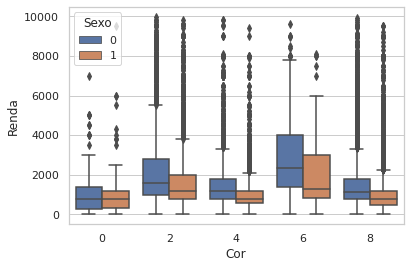

In [30]:

sns.boxplot(data = dados.query("Renda<10000"),x='Cor',y='Renda', hue='Sexo')

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [31]:
from scipy import stats



### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...